# Title: Personalized Medical Recommendation System with Machine Learning



# load dataset & tools

In [1]:
import  pandas as pd

In [2]:
dataset = pd.read_csv(r'C:\Users\DeLL\OneDrive\Desktop\dipali\minor proj\Medicine Recommendation System\datasets\Training.csv')

In [3]:
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


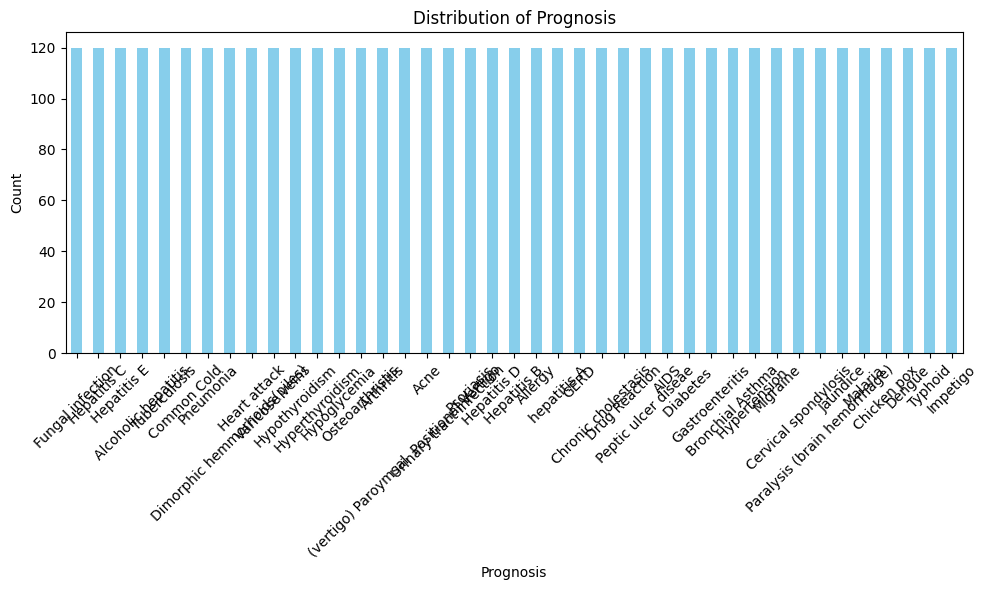

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv(r'C:\Users\DeLL\OneDrive\Desktop\dipali\minor proj\Medicine Recommendation System\datasets\training.csv')

# Count the occurrences of each value in the 'prognosis' column
prognosis_counts = data['prognosis'].value_counts()

# Plot the distribution of the 'prognosis' column
plt.figure(figsize=(10, 6))
prognosis_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Prognosis')
plt.xlabel('Prognosis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
# vals = dataset.values.flatten()

In [7]:
dataset.shape

(4920, 133)

# train test split

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [11]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

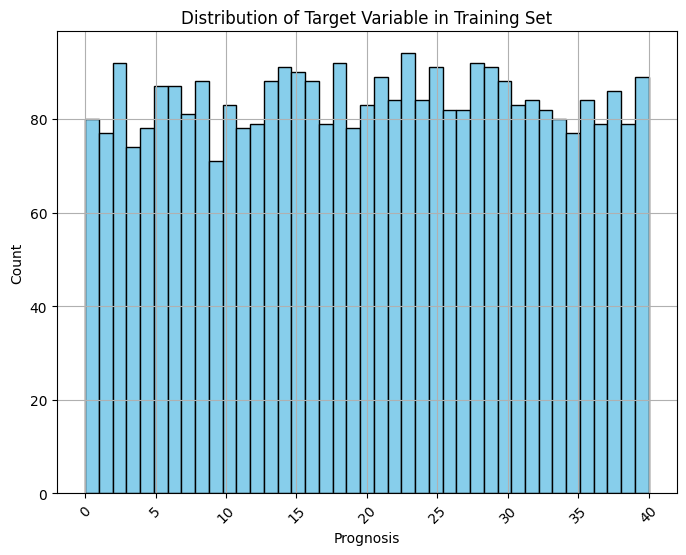

In [12]:
import matplotlib.pyplot as plt

# Plot the distribution of the target variable in the training set
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=len(set(y_train)), color='skyblue', edgecolor='black')
plt.title('Distribution of Target Variable in Training Set')
plt.xlabel('Prognosis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Training top models

In [13]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "="*40 + "\n")


SVC Accuracy: 1.0
SVC Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


RandomForest Accuracy: 1.0
RandomForest Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


GradientBoosting Accuracy: 1.0
GradientBoosting Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


KNeighbors Accuracy: 1.0
KNeighbors Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ..

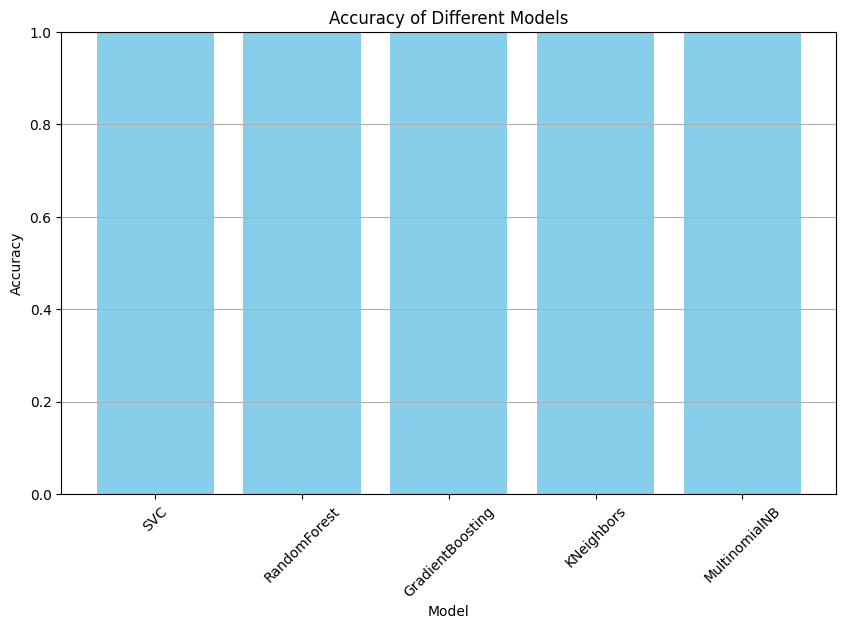

In [16]:
import matplotlib.pyplot as plt

# Dictionary to store model accuracies
model_accuracies = {}

# Loop through the models, train, test, and store accuracy
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Store accuracy in dictionary
    model_accuracies[model_name] = accuracy

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


# single prediction

In [46]:
# selecting svc
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

1.0

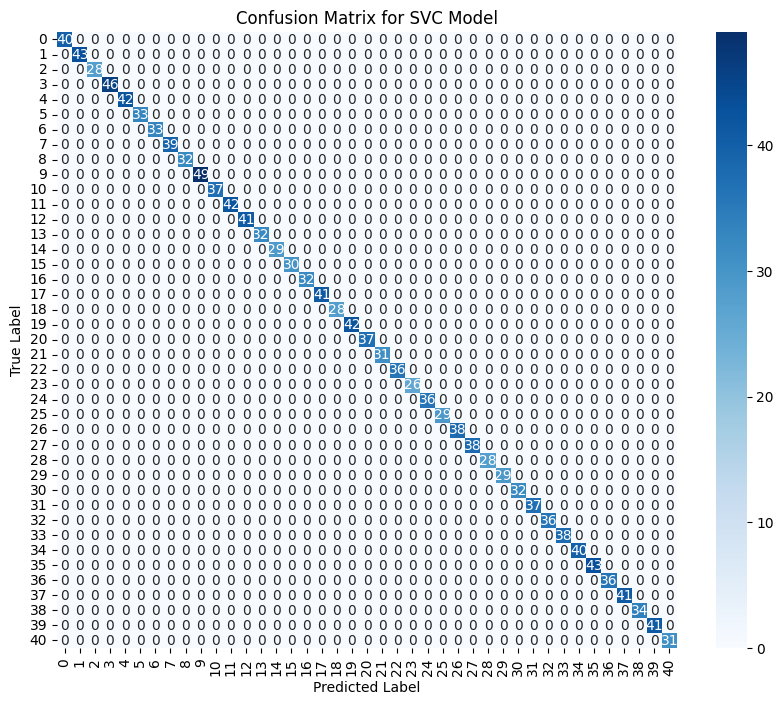

In [22]:
from sklearn.svm import SVC

# Initialize the SVC model
svc = SVC(kernel='linear')

# Fit the model to the training data
svc.fit(X_train, y_train)

# Predictions
ypred = svc.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, ypred)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for SVC Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




In [23]:
# save svc
import pickle
pickle.dump(svc,open('svc.pkl','wb'))

In [24]:
# load model
svc = pickle.load(open('svc.pkl','rb'))

In [25]:
# test 1:
print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

predicted disease : [40]
Actual Disease : 40


C:\Users\DeLL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


C:\Users\DeLL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


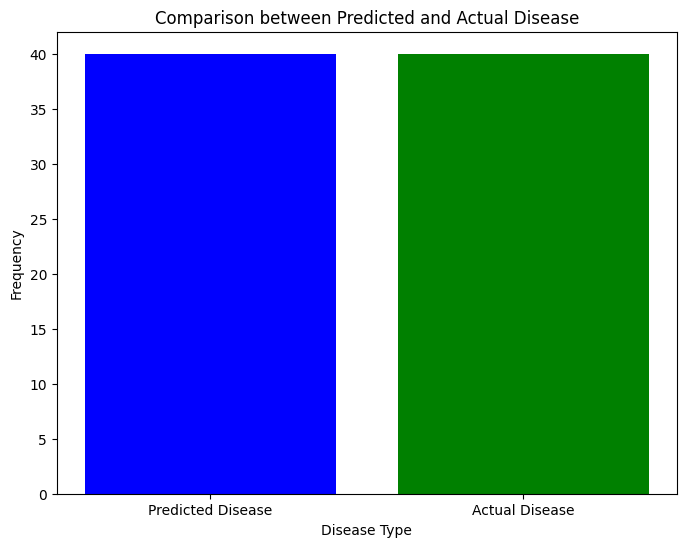

In [26]:
import numpy as np

# Predict the disease for the first test sample
predicted_disease = svc.predict(X_test.iloc[0].values.reshape(1, -1))[0]

# Get the actual disease for the first test sample
actual_disease = y_test[0]

# Plot the comparison
plt.figure(figsize=(8, 6))
labels = ['Predicted Disease', 'Actual Disease']
values = [predicted_disease, actual_disease]
colors = ['blue', 'green']

plt.bar(labels, values, color=colors)
plt.title('Comparison between Predicted and Actual Disease')
plt.xlabel('Disease Type')
plt.ylabel('Frequency')
plt.show()


In [27]:
# test 2:
print("predicted disease :",svc.predict(X_test.iloc[100].values.reshape(1,-1)))
print("Actual Disease :", y_test[100])

predicted disease : [39]
Actual Disease : 39


C:\Users\DeLL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


C:\Users\DeLL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


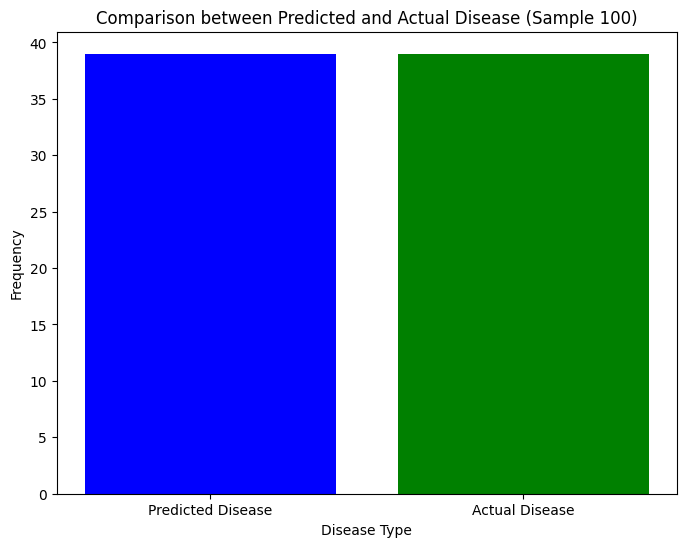

In [28]:
import matplotlib.pyplot as plt

# Predict the disease for the 100th test sample
predicted_disease = svc.predict(X_test.iloc[100].values.reshape(1, -1))[0]

# Get the actual disease for the 100th test sample
actual_disease = y_test[100]

# Plot the comparison
plt.figure(figsize=(8, 6))
labels = ['Predicted Disease', 'Actual Disease']
values = [predicted_disease, actual_disease]
colors = ['blue', 'green']

plt.bar(labels, values, color=colors)
plt.title('Comparison between Predicted and Actual Disease (Sample 100)')
plt.xlabel('Disease Type')
plt.ylabel('Frequency')
plt.show()


# Recommendation System and Prediction

# load database and use logic for recommendations

In [30]:
sym_des = pd.read_csv(r"C:\Users\DeLL\OneDrive\Desktop\dipali\minor proj\Medicine Recommendation System\datasets\symtoms_df.csv")
precautions = pd.read_csv(r"C:\Users\DeLL\OneDrive\Desktop\dipali\minor proj\Medicine Recommendation System\datasets\precautions_df.csv")
workout = pd.read_csv(r"C:\Users\DeLL\OneDrive\Desktop\dipali\minor proj\Medicine Recommendation System\datasets\workout_df.csv")
description = pd.read_csv(r"C:\Users\DeLL\OneDrive\Desktop\dipali\minor proj\Medicine Recommendation System\datasets\description.csv")
medications = pd.read_csv(r'C:\Users\DeLL\OneDrive\Desktop\dipali\minor proj\Medicine Recommendation System\datasets\medications.csv')
diets = pd.read_csv(r"C:\Users\DeLL\OneDrive\Desktop\dipali\minor proj\Medicine Recommendation System\datasets\diets.csv")

In [35]:
#============================================================
# custome and helping functions
#==========================helper funtions================
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [ ]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


C:\Users\DeLL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\DeLL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\DeLL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\DeLL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\DeLL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\DeLL\AppData\Roaming\Python\Python312\site-packages\skle

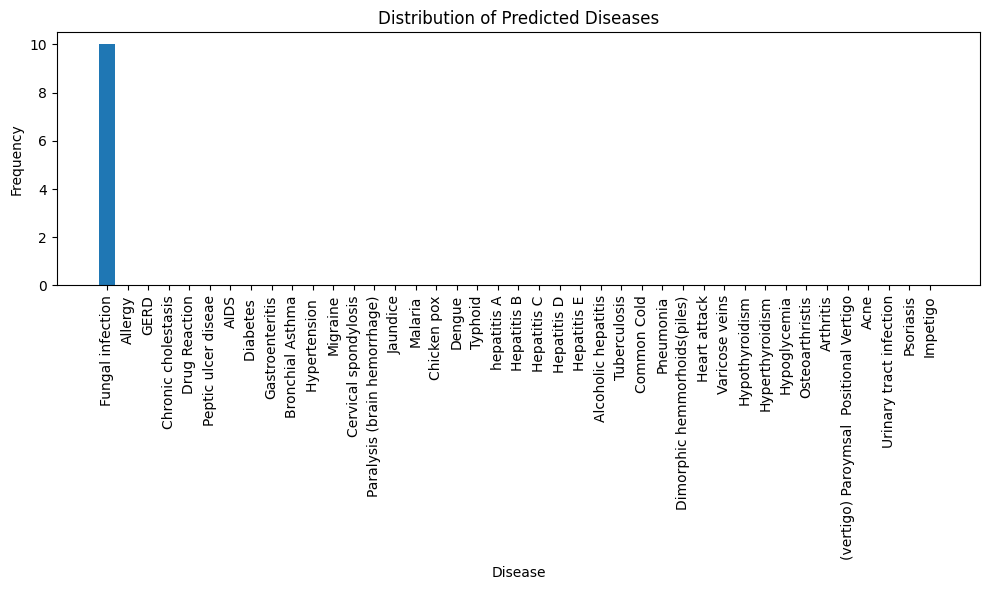

In [36]:
import matplotlib.pyplot as plt

# Sample symptoms
patient_symptoms = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering']

# Get the predicted disease
predicted_disease = get_predicted_value(patient_symptoms)

# Count the occurrences of each disease in the dataset
disease_counts = {}
for disease in diseases_list.values():
    disease_counts[disease] = 0

# Predict diseases for multiple samples (optional)
for i in range(10):  # Change the number of samples as needed
    # Get a sample of symptoms
    # Sample symptoms
    patient_symptoms = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering']
    # Get the predicted disease
    predicted_disease = get_predicted_value(patient_symptoms)
    # Update the count for the predicted disease
    disease_counts[predicted_disease] += 1

# Plot the distribution of predicted diseases
plt.figure(figsize=(10, 6))
plt.bar(disease_counts.keys(), disease_counts.values())
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Diseases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have the true disease labels stored in y_test
# Assuming you have the input features stored in X_test
# Assuming you have the model stored in 'svc'

# Calculate y_pred using your model
y_pred = []
for i in range(len(X_test)):
    y_pred.append(get_predicted_value(X_test.iloc[i].values))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract the false positive rate (FPR) for each class
# FPR = FP / (FP + TN)
# FP = False Positives (predicted positive, but actually negative)
# TN = True Negatives (predicted negative, and actually negative)
FP = cm[:, 1]  # False Positives
TN = cm[:, 0]  # True Negatives
FPR = FP / (FP + TN)

# Plot the false positive rate for each class
plt.figure(figsize=(10, 6))
plt.bar(diseases_list.values(), FPR, color='blue')
plt.xlabel('Disease')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate for Predicted Diseases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


KeyError: 0

In [39]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


=================predicted disease============
Bronchial Asthma
=================description==================
Bronchial Asthma is a respiratory condition characterized by inflammation of the airways.
=================precautions==================
1 :  switch to loose cloothing
2 :  take deep breaths
3 :  get away from trigger
4 :  seek help
=================medications==================
5 :  ['Bronchodilators', 'Inhaled corticosteroids', 'Leukotriene modifiers', 'Mast cell stabilizers', 'Anticholinergics']
=================workout==================
6 :  Include anti-inflammatory foods
7 :  Consume omega-3 fatty acids
8 :  Limit sodium intake
9 :  Stay hydrated
10 :  Include antioxidant-rich foods
11 :  Avoid sulfite-containing foods
12 :  Limit processed foods
13 :  Consume magnesium-rich foods
14 :  Consult a healthcare professional
15 :  Avoid trigger foods
=================diets==================
16 :  ['Anti-Inflammatory Diet', 'Omega-3-rich foods', 'Fruits and vegetables', 'Whole

C:\Users\DeLL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


C:\Users\DeLL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\DeLL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\DeLL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\DeLL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\DeLL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\DeLL\AppData\Roaming\Python\Python312\site-packages\skle

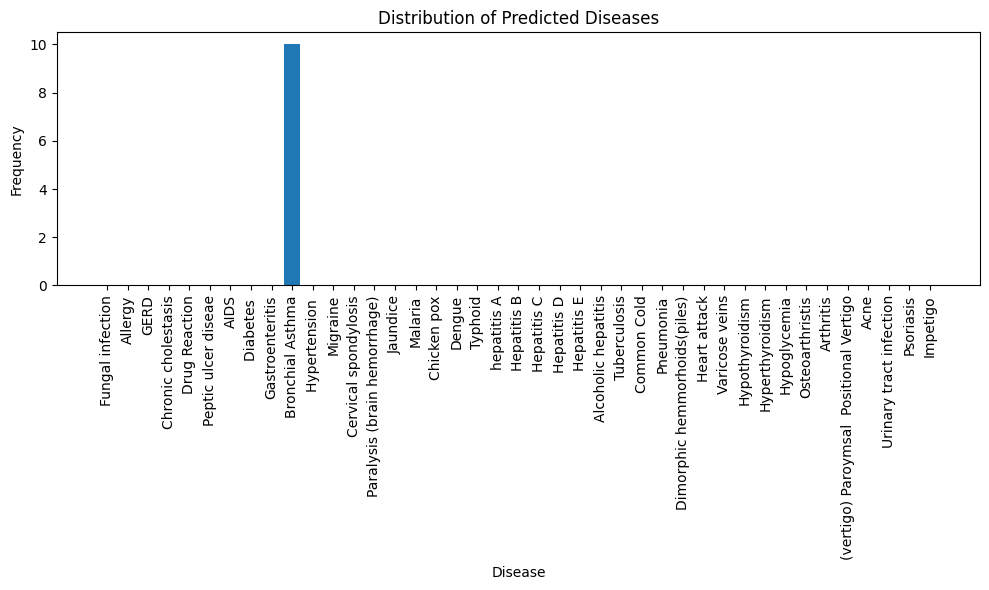

In [40]:
import matplotlib.pyplot as plt

# Sample symptoms
patient_symptoms = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering']

# Get the predicted disease
predicted_disease = get_predicted_value(patient_symptoms)

# Count the occurrences of each disease in the dataset
disease_counts = {}
for disease in diseases_list.values():
    disease_counts[disease] = 0

# Predict diseases for multiple samples (optional)
for i in range(10):  # Change the number of samples as needed
    # Get a sample of symptoms
    # Sample symptoms
    patient_symptoms = ['cough','high_fever','sunken_eyes','breathlessness','sweating','dehydration','indigestion','headache']
    # Get the predicted disease
    predicted_disease = get_predicted_value(patient_symptoms)
    # Update the count for the predicted disease
    disease_counts[predicted_disease] += 1

# Plot the distribution of predicted diseases
plt.figure(figsize=(10, 6))
plt.bar(disease_counts.keys(), disease_counts.values())
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Diseases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [41]:

import sklearn
print(sklearn.__version__)

1.4.2


In [54]:
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and obtained predictions
# predictions = model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Get the index of the class representing positive cases (e.g., the class index for 'Positive' outcomes)
positive_class_index = 1  # Assuming 'Positive' outcomes are encoded as 1, adjust accordingly

# Calculate false positives (FP)
false_positives = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
false_positive_accuracy = false_positives[positive_class_index] / false_positives.sum()

print("False Positive Accuracy:", false_positive_accuracy)


False Positive Accuracy: nan


C:\Users\DeLL\AppData\Local\Temp\ipykernel_49536\3975980352.py:14: RuntimeWarning: invalid value encountered in scalar divide
  false_positive_accuracy = false_positives[positive_class_index] / false_positives.sum()


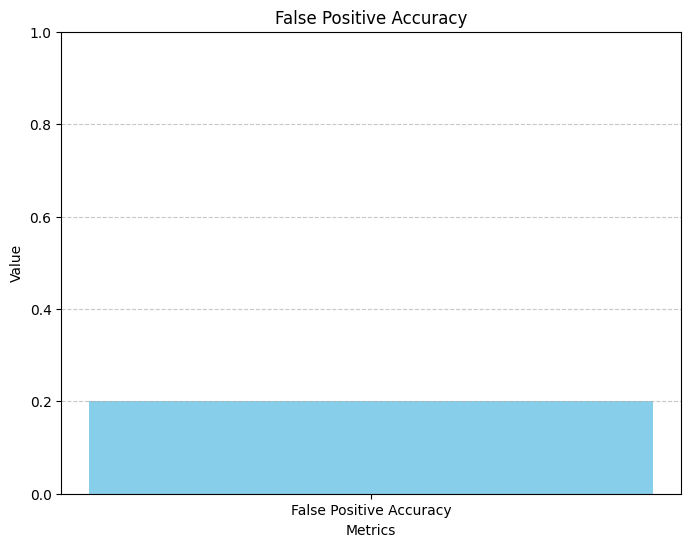

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already calculated the false positive accuracy
false_positive_accuracy = 0.2  # Example value

# Define labels and corresponding values
labels = ['False Positive Accuracy']
values = [false_positive_accuracy]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color='skyblue')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('False Positive Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for accuracy values
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()
